In [1]:

from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

from itertools import combinations
from collections import deque
import IPython
from IPython.display import display, Image
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import Adam
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from rdkit.Chem import AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

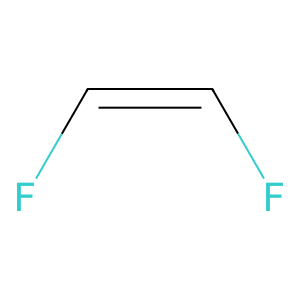

In [6]:
from rdkit import Chem

smiles = "F\C=C/F"  # Given SMILES

mol = Chem.MolFromSmiles(smiles)
# Display the molecule
Draw.MolToImage(mol)


In [2]:
df = pd.read_csv("SMILES_Big_Data_Set.csv")

df.head()

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.2130


In [3]:
df.head()
mol=Chem.MolFromSmiles(df['SMILES'][0])
atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]

print(atoms)

['O', 'S', 'O', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'N', 'C', 'C', 'C', 'C', 'C', 'C', 'N', 'C', 'C', 'C', 'C', 'C', 'S']


'Click on the photo to zoom it'

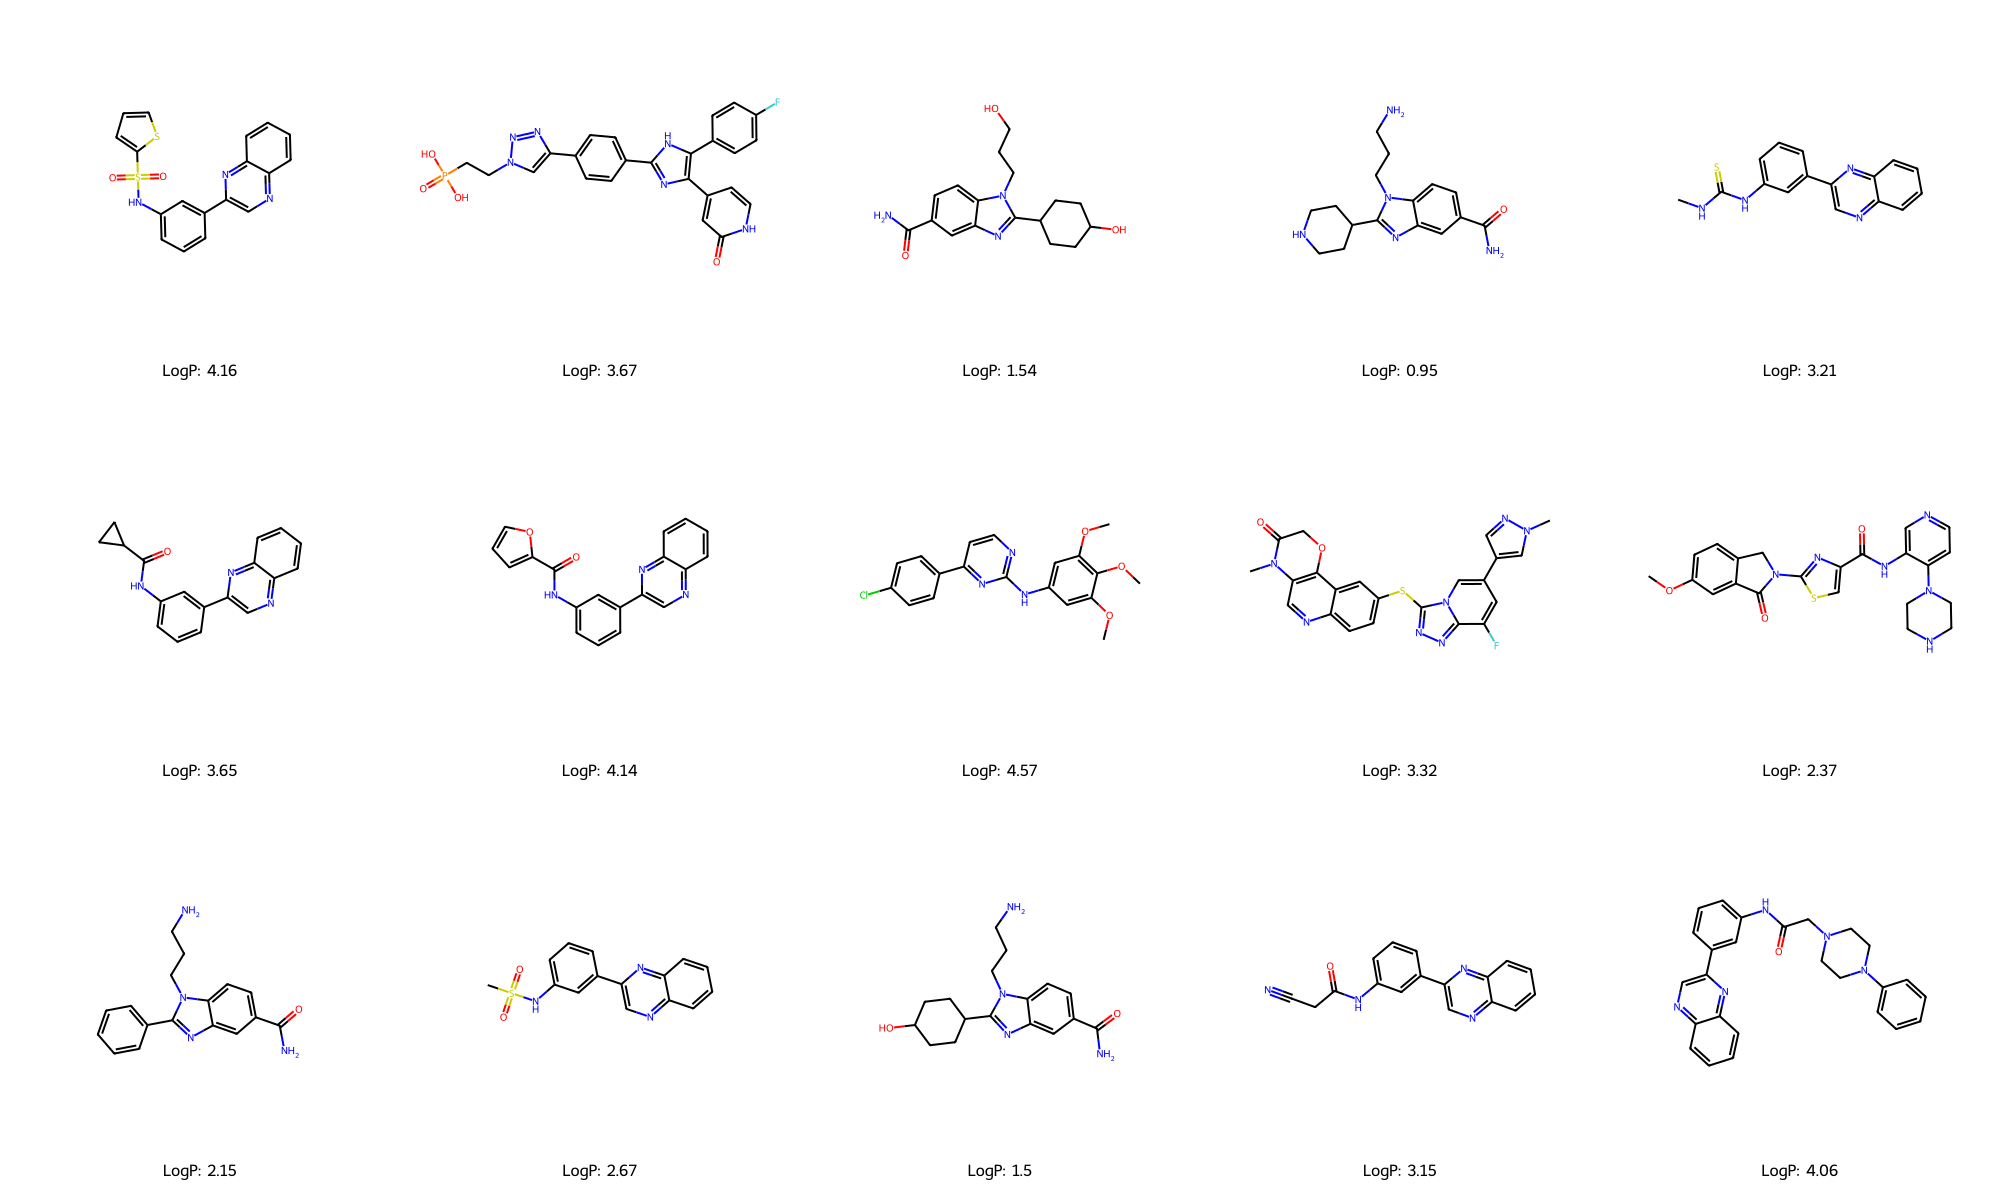

In [15]:
def show_smiles(smiles):
  molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
  img = Draw.MolsToGridImage(molecules[:15], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'LogP: {round(x, 2)}' for x in df['logP']], 
                             returnPNG=False).save("molecules.png")
                             
  from IPython.display import display, Image
  display("Click on the photo to zoom it")
  display(Image("molecules.png"))

show_smiles(df["SMILES"])

C:\Users\snith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


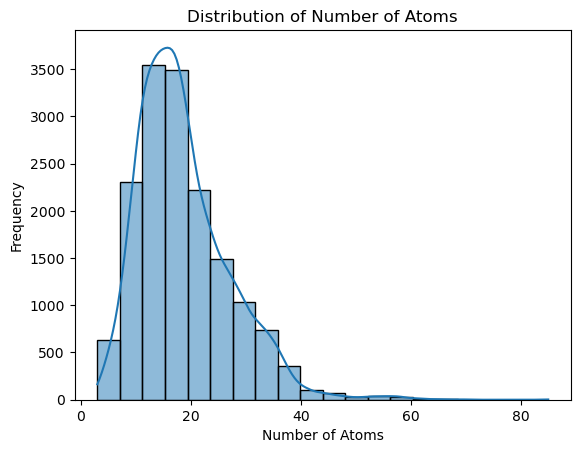

C:\Users\snith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


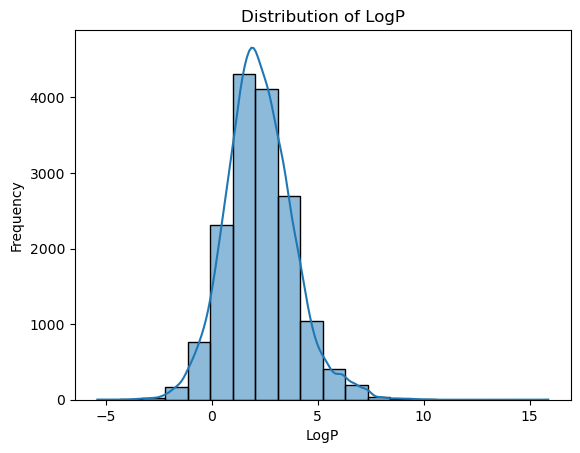

In [5]:
def histogram_of_distribution(data_frame):

  sns.histplot(data=df, x='num_atoms', bins=20, kde=True)
  plt.title('Distribution of Number of Atoms')
  plt.xlabel('Number of Atoms')
  plt.ylabel('Frequency')
  plt.show()

  sns.histplot(data=df, x='logP', bins=20, kde=True)
  plt.title('Distribution of LogP')
  plt.xlabel('LogP')
  plt.ylabel('Frequency')
  plt.show()

histogram_of_distribution(df)

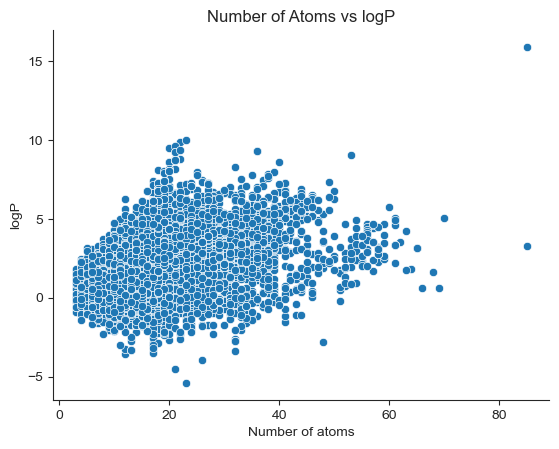

In [7]:
def atoms_and_logP(df):
    sns.scatterplot(data=df , x="num_atoms" , y ="logP") 
    sns.despine()
    sns.set_style("ticks")
    plt.title("Number of Atoms vs logP")
    plt.ylabel("logP")
    plt.xlabel("Number of atoms")
    plt.show()
atoms_and_logP(df)

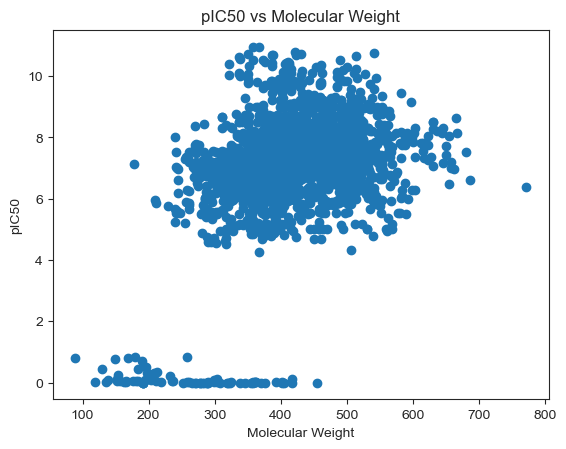

In [39]:
def molecular_weight(smiles_list, pIC50):
    mol_weights = [Descriptors.MolWt(Chem.MolFromSmiles(smiles)) for smiles in smiles_list]

    plt.scatter(mol_weights,pIC50)
    plt.xlabel("Molecular Weight")
    plt.ylabel("pIC50")
    plt.title("pIC50 vs Molecular Weight")
    plt.show()
df_new =df.iloc[:2000,:]
molecular_weight(df_new["SMILES"], df_new["pIC50"])


In [19]:

html_code = \
'''
<p>This is a 3D object you can interact with it!</p>
<iframe style="width: 900px; height: 900px;" frameborder="0" src="https://embed.molview.org/v1/?mode=balls&cid=127050563"></iframe>
'''
display(IPython.display.HTML(html_code))

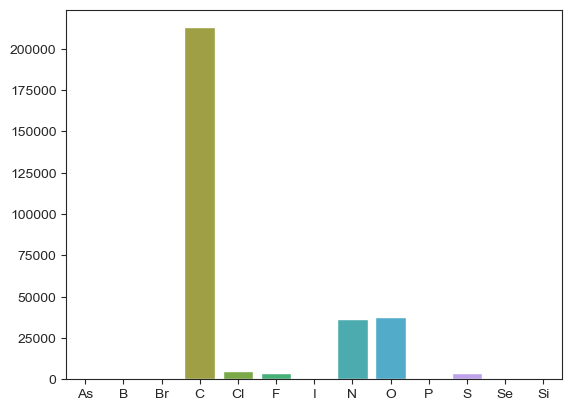

In [9]:
def atom_frequency(smiles_list):
    atom_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        atoms = mol.GetAtoms()
        atom_counts.extend([atom.GetSymbol() for atom in atoms])
    plot_data = pd.Series(atom_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

atom_frequency(df['SMILES'])

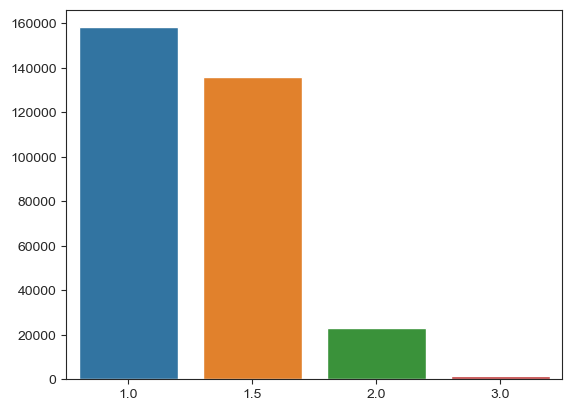

In [10]:
def bond_frequency(smiles_list):
    bond_counts = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        bonds = mol.GetBonds()
        bond_counts.extend([bond.GetBondTypeAsDouble() for bond in bonds])
    plot_data = pd.Series(bond_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values)

bond_frequency(df['SMILES'])

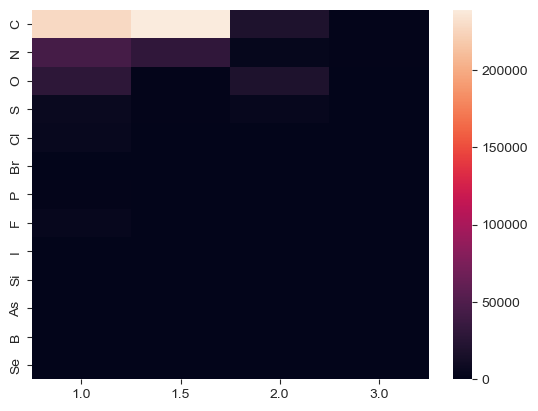

In [20]:
def atom_bond_heatmap(smiles_list):
    atom_types = ['C', 'N', 'O', 'S', 'Cl', 'Br', 'P', 'F', 'I', 'Si', 'As', 'B', 'Se']
    bond_types = [1.0, 1.5, 2.0, 3.0]
    data = np.zeros((len(atom_types), len(bond_types)))
    for smile in smiles_list:
        mol=Chem.MolFromSmiles(smile)
        bonds=mol.GetBonds()
        for bond in bonds:
            bond_type = bond.GetBondTypeAsDouble()
            bond_idx = bond_types.index(bond_type)
            for atom in [bond.GetBeginAtom(), bond.GetEndAtom()]:
                atom_type = atom.GetSymbol()
                atom_idx = atom_types.index(atom_type)
                data[atom_idx, bond_idx] += 1
    sns.heatmap(data, xticklabels=bond_types, yticklabels=atom_types)

atom_bond_heatmap(df["SMILES"])
            

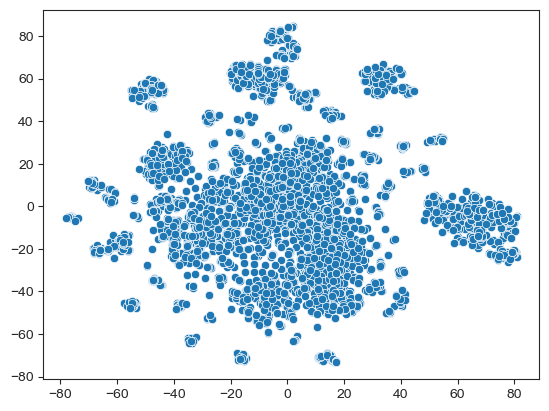

In [12]:
def fingerprint_tsne(smiles_list):
    from sklearn.manifold import TSNE
    from rdkit.Chem import AllChem
    from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

    generator = GetMorganGenerator(radius=2, fpSize=2048)

    fps = [generator.GetFingerprint(Chem.MolFromSmiles(smiles)) for smiles in smiles_list]

    # Convert list of fingerprints to a numpy array
    fps_array = np.asarray([np.array(fingerprint) for fingerprint in fps])

    # Perform t-SNE on the fingerprints
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(fps_array)

    # Plotting the t-SNE results
    sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1])

fingerprint_tsne(df.loc[:4500,'SMILES'])

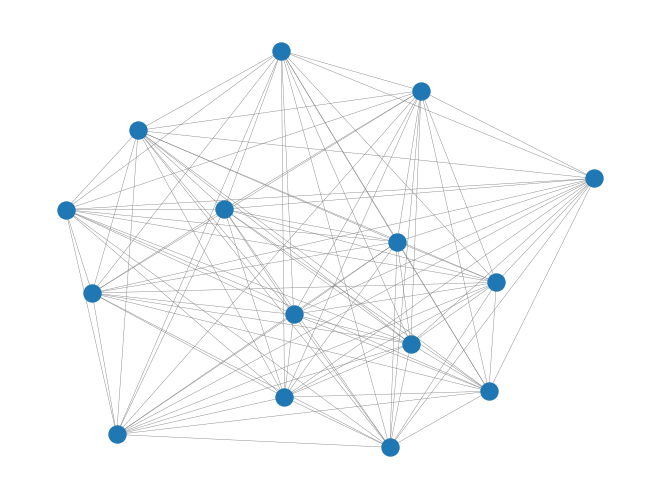

In [16]:
def molecular_similarity(smiles_list):
    
    generator = GetMorganGenerator(radius=2, fpSize=2048)

    # Generate molecular fingerprints using the Morgan algorithm with radius=2
    fps = [generator.GetFingerprint(Chem.MolFromSmiles(smiles)) for smiles in smiles_list]

 
    similarity_scores = []
    for fp1, fp2 in combinations(fps, 2):
        similarity_score = DataStructs.TanimotoSimilarity(fp1, fp2)
        similarity_scores.append(similarity_score)

    # Build a similarity network using NetworkX
    G = nx.Graph()
    for idx, smiles in enumerate(smiles_list):
        G.add_node(idx, smiles=smiles)
    for (i, j), weight in zip(combinations(range(len(smiles_list)), 2), similarity_scores):
        G.add_edge(i, j, weight=weight)

    # Visualize the network
    pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, node_size=150, width=0.3, edge_color='gray', with_labels=False)
    plt.show()

short_df_for_grahp = df.head(15)
molecular_similarity(short_df_for_grahp["SMILES"])

In [59]:
import random
class DRLAgent:
    def __init__(self, state_size, action_size, X_train, num_actions):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.X_train = X_train
        self.num_actions = num_actions
        
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()
    def smiles_to_morgan(self, smiles):
        """ Convert a SMILES string into a Morgan fingerprint (2048-bit) """
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros(2048)  
        generator = GetMorganGenerator(radius=2, fpSize=2048)
        return np.array(generator.GetFingerprintAsBitVect(mol))
    def _build_model(self):
        model = Sequential()
      
        model.add(Dense(128, input_shape=(self.state_size,), activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def _smiles_to_fingerprint(self, smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((2048,))
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048))

    def calculate_reward(self, smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return -1  # Invalid molecule, negative reward
        
        mol_weight = Descriptors.MolWt(mol)
        logP = Descriptors.MolLogP(mol)
        qed = Descriptors.qed(mol)
        
        reward = qed - 0.1 * mol_weight + 0.05 * logP
        return reward

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(self.action_size)
    
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            print(state[0])
            fp_array = self._smiles_to_fingerprint(state[0])
            print(fp_array.shape, np.array(state[-1:-8:-1]).shape)
            state = np.concatenate([fp_array, state[-1:-8:-1]])  # EDITED: Combine FP + descriptors
            print(next_state.shape)
            print(state.shape)
            state = state.reshape(1, self.state_size)
            target = reward
            if not done:
                next_state = next_state.reshape(1, self.state_size)
                target += self.gamma * np.amax(self.target_model.predict(next_state)[0])
            print(type(state))  # Should be numpy.ndarray or tensorflow.Tensor
            print(state.dtype)  # Should be float32 or int32
            state = state.astype(np.float32)

            target_f = self.model.predict(state)
            target_f[0][action] = target
                # Update the model with the updated target Q-value
            self.model.fit(state.reshape(1, self.state_size), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save(self, name):
        self.model.save_weights(name)

    def load(self, name):
        self.model.load_weights(name)


In [60]:
from rdkit import Chem
from rdkit.Chem import Descriptors

class DrugDesignEnv:

    def __init__(self, num_features, num_actions, X_train):
        self.num_actions = num_actions
        self.generated_smiles = ""  # Start with an empty molecule
        self.X_train = X_train
        self.max_steps = 10
        self.step_count = 0
        
        # Allowed atoms (extended)
        self.valid_atoms = ["C", "O", "N", "H", "Cl", "Br", "F", "Cu", "Ca", "S", "P", "I", "Se", "B", "Si", "Mn", "Zn", "Mg"]
        
        # Allowed functional groups (extended)
        self.valid_groups = ["-OH", "-NH2", "-COOH", "-CH3", "-CH2OH", "-CF3", "-NH", "-NO2", "-COOCH3", "-CHO", "-CONH2"]
        
        # Start with simple atoms and groups
        self.elements = self.valid_atoms + self.valid_groups

    def _get_reward(self):
        """Compute reward based on molecular properties."""
        if not self.generated_smiles:
            return -1.0  # Invalid molecule
        
        mol = Chem.MolFromSmiles(self.generated_smiles)
        if mol is None:
            return -1.0  # Invalid molecule
        
        # Calculate drug-like properties
        logp = Descriptors.MolLogP(mol)  # Lipophilicity
        mol_weight = Descriptors.MolWt(mol)  # Molecular weight
        qed = Descriptors.qed(mol)  # Drug-likeness score

        # Reward function: Favor drug-like properties
        reward = -abs(logp - 2.5)  # Favor logP near 2.5
        reward -= abs(mol_weight - 300) / 100  # Favor MW ~300
        reward += qed  # Favor higher QED score
        
        return reward

    def _is_done(self):
        """Check if the maximum number of steps has been reached."""
        self.step_count += 1
        return self.step_count >= self.max_steps

    def get_smiles(self):
        print(self.generated_smiles)
        """Return the SMILES string representation of the current molecule."""
        return self.generated_smiles if self.generated_smiles else "Empty"

    def _validate_smiles(self):
        """Ensure that the generated SMILES is valid."""
        mol = Chem.MolFromSmiles(self.generated_smiles)
        if mol is None:
            return False
        return True

    def add_element(self, element):
        """Add an atom or functional group to the molecule."""
        if element not in self.valid_atoms and element not in self.valid_groups:
            return -1.0  # Invalid element penalty

        self.generated_smiles += element  # Append element to SMILES string
        
        if not self._validate_smiles():  # Ensure the SMILES remains valid
            self.generated_smiles = self.generated_smiles[:-len(element)]  # Revert last change if invalid
            return -1.0  # Invalid molecule penalty
        
        return self._get_reward()

    def remove_element(self, element):
        """Remove an atom or functional group from the molecule."""
        if element in self.generated_smiles:
            self.generated_smiles = self.generated_smiles.replace(element, "", 1)
        
        if not self._validate_smiles():  # Ensure the SMILES remains valid
            self.generated_smiles += element  # Revert last change if invalid
            return -1.0  # Invalid molecule penalty
        
        return self._get_reward()

    def step(self, action):
        """Perform an action and move one step forward."""
        if action < 0 or action >= len(self.elements):
            return self.get_smiles(), -1.0, False  # Invalid action penalty
        
        selected_element = self.elements[action]

        # Add or remove the selected element
        if selected_element in self.generated_smiles:
            reward = self.remove_element(selected_element)
        else:
            reward = self.add_element(selected_element)

        done = self._is_done()
        return self.get_smiles(), reward, done

    def reset(self, initial_smiles=""):
        """Reset the environment with a given SMILES string."""
        self.generated_smiles = initial_smiles  # Start with the given molecule
        self.step_count = 0
        return self.get_smiles()



In [61]:
import numpy as np

def simulate(agent, env, batch_size, max_episodes, X_train):
    """
    Simulate the training process of the agent in the environment.

    Args:
        agent (DRLAgent): The Deep Reinforcement Learning Agent.
        env (DrugDesignEnv): The Drug Design Environment.
        batch_size (int): Size of the minibatch for replay.
        max_episodes (int): Maximum number of episodes to run.
        X_train (list): List of preprocessed SMILES strings and descriptors for training.

    Returns:
        rewards (list): List of episode rewards.
        generated_smiles (list): List of generated SMILES strings.
    """
    episode = 0
    rewards = []
    generated_smiles = []

    while episode < max_episodes:
        # Select a random starting molecule from X_train
        if len(X_train) > 0:
            random_index = np.random.choice(len(X_train))  # EDITED: Use len() since X_train is a list
            initial_smiles, initial_descriptors = X_train[random_index]  # EDITED: Extract SMILES and descriptors
        else:
            initial_smiles = ""
            initial_descriptors = np.zeros(7)  # EDITED: Default descriptors if no training data
        
        env.reset(initial_smiles)  # Reset with the selected molecule
        smiles = env.get_smiles()  # Get initial SMILES
        done = False
        episode_reward = 0

        while not done:
            s=smiles
            s = np.array([s])
            fp_array = agent._smiles_to_fingerprint(smiles)  # Convert SMILES to FP
            state = np.concatenate([fp_array, initial_descriptors])  # EDITED: Combine FP + descriptors
            
            action = agent.act(state)  # EDITED: Pass full state instead of SMILES
            next_smiles, reward, done = env.step(action)

            # Extract descriptors from X_train if next_smiles exists
            next_descriptors = next((desc for sm, desc in X_train if sm == next_smiles), np.zeros(7))  # EDITED
            
            next_fp_array = agent._smiles_to_fingerprint(next_smiles)
            next_state = np.concatenate([next_fp_array, next_descriptors])
            # EDITED: Combine FP + descriptors

            agent.remember(np.concatenate([s, initial_descriptors]), action, reward, next_state, done)
            smiles = next_smiles
            episode_reward += reward

            if len(agent.memory) >= batch_size:
                print()
                agent.replay(batch_size)
                

        episode += 1
        agent.update_target_model()
        rewards.append(episode_reward)
        generated_smiles.append(smiles)

        print(f"Episode {episode}/{max_episodes} - Reward: {episode_reward:.4f}, SMILES: {smiles}")

        if agent.epsilon > agent.epsilon_min:
            agent.epsilon *= agent.epsilon_decay

    return rewards, generated_smiles


In [62]:
def smiles_to_fp_array(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    fp_array = np.array(list(fp.ToBitString())).astype(int)
    return fp_array

In [63]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from sklearn.model_selection import train_test_split

def prepare_data(df):
    if 'SMILES' not in df.columns:
        raise ValueError("DataFrame must contain a 'SMILES' column.")
    
    # Extract and shuffle SMILES strings
    smiles_list = df['SMILES'].dropna().tolist()
    np.random.shuffle(smiles_list)

    # Split the data into training and test sets
    X_train, X_test = train_test_split(smiles_list, test_size=0.2, random_state=42)

    selected_X_train = []
    valid_smiles = []
    failed_smiles = []  # To store invalid SMILES

    for sm in X_train:
        mol = Chem.MolFromSmiles(sm)
        if mol:
            try:
                # Generate Morgan Fingerprint (Not used in output, just descriptors)
                fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

                # Calculate molecular descriptors
                mol_weight = Descriptors.MolWt(mol)
                logp = Descriptors.MolLogP(mol)
                tpsa = Descriptors.TPSA(mol)
                h_donors = Descriptors.NumHDonors(mol)
                h_acceptors = Descriptors.NumHAcceptors(mol)
                rot_bonds = Descriptors.NumRotatableBonds(mol)
                heavy_atoms = Descriptors.HeavyAtomCount(mol)

                # Store as tuple (SMILES, descriptors array)
                features = np.array([mol_weight, logp, tpsa, h_donors, h_acceptors, rot_bonds, heavy_atoms], dtype=np.float32)
                selected_X_train.append((sm, features))  # FIXED: Store tuple (SMILES, descriptors)
                
                valid_smiles.append(sm)
            except Exception as e:
                failed_smiles.append(sm)
                print(f"Error processing {sm}: {e}")
        else:
            failed_smiles.append(sm)
            print(f"Invalid SMILES: {sm}")

    print(f"Successfully processed {len(valid_smiles)} molecules.")
    print(f"Failed to process {len(failed_smiles)} molecules.")

    return selected_X_train, valid_smiles  # X_train now contains (SMILES, descriptors)


[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerator
[14:36:03] DEPRECATION WARNING: please use MorganGenerat

Successfully processed 200 molecules.
Failed to process 0 molecules.
Training started...
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
Episode 1/4 - Reward: -10.0000, SMILES: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
Oc1ccc(

[14:36:04] DEPRECATION WARNING: please use MorganGenerator
[14:36:04] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12Cu
[14:36:04] SMILES Parse Error: check for mistakes around position 64:
[14:36:04] c(Oc4ccccc4)cc3)c12Cu
[14:36:04] ~~~~~~~~~~~~~~~~~~~~^
[14:36:04] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12Cu' for input: 'Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12Cu'
[14:36:04] DEPRECATION WARNING: please use MorganGenerator
[14:36:04] DEPRECATION WARNING: please use MorganGenerator
[14:36:04] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
[14:36:04] SMILES Parse Error: check for mistakes around position 19:
[14:36:04] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:36:04] ~~~~~~~~~~~~~~~~~~^
[14:36:04] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc

Oc1ccc(Cc2cccn3nc(c4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
Episode 3/4 - Reward: -14.2421, SMILES: Oc1ccc(Cc2cccn3nc(c4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12

c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U51


[14:36:08] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[14:36:08] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[14:36:08] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:08] SMILES Parse Error: check for mistakes around position 18:
[14:36:08] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:08] ~~~~~~~~~~~~~~~~~^
[14:36:08] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U51


[14:36:09] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U51


[14:36:09] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
<class 'numpy.ndarray'>
<U62


[14:36:10] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43


[14:36:10] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:10] SMILES Parse Error: check for mistakes around position 7:
[14:36:10] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:10] ~~~~~~^
[14:36:10] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[14:36:10] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U43


[14:36:11] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)


[14:36:11] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:11] SMILES Parse Error: check for mistakes around position 7:
[14:36:11] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:11] ~~~~~~^
[14:36:11] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U50


[14:36:12] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'numpy.ndarray'>
<U51


[14:36:12] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:36:13] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U62


[14:36:13] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

[14:36:13] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:13] SMILES Parse Error: check for mistakes around position 18:
[14:36:13] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:13] ~~~~~~~~~~~~~~~~~^
[14:36:13] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43


[14:36:14] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:14] SMILES Parse Error: check for mistakes around position 7:
[14:36:14] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:14] ~~~~~~^
[14:36:14] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U51


[14:36:14] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U43


[14:36:15] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:15] SMILES Parse Error: check for mistakes around position 7:
[14:36:15] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:15] ~~~~~~^
[14:36:15] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[14:36:15] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:15] SMILES Parse Error: check for mistakes around position 18:
[14:36:15] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:15] ~~~~~~~~~~~~~~~~~^
[14:36:15] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U62


[14:36:16] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:16] SMILES Parse Error: check for mistakes around position 18:
[14:36:16] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:16] ~~~~~~~~~~~~~~~~~^
[14:36:16] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U43


[14:36:16] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:36:16] SMILES Parse Error: check for mistakes around position 7:
[14:36:16] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:36:16] ~~~~~~^
[14:36:16] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

[14:36:17] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
<class 'numpy.ndarray'>
<U51


[14:36:17] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:36:17] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:36:17] SMILES Parse Error: check for mistakes around position 17:
[14:36:17] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:36:17] ~~~~~~~~~~~~~~~~^
[14:36:17] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
<class 'numpy.ndarray'>
<U43


[14:36:18] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:18] SMILES Parse Error: check for mistakes around position 7:
[14:36:18] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:18] ~~~~~~^
[14:36:18] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U50


[14:36:18] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

[14:36:19] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:19] SMILES Parse Error: check for mistakes around position 18:
[14:36:19] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:19] ~~~~~~~~~~~~~~~~~^
[14:36:19] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
<class 'numpy.ndarray'>
<U62


[14:36:19] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:19] SMILES Parse Error: check for mistakes around position 18:
[14:36:19] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:19] ~~~~~~~~~~~~~~~~~^
[14:36:19] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62


[14:36:19] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:36:19] SMILES Parse Error: check for mistakes around position 19:
[14:36:19] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:36:19] ~~~~~~~~~~~~~~~~~~^
[14:36:19] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
<class 'numpy.ndarray'>
<U50


[14:36:20] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:36:20] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:36:20] SMILES Parse Error: check for mistakes around position 43:
[14:36:20] nc4[n]cc2c34)c(Cl)c1H
[14:36:20] ~~~~~~~~~~~~~~~~~~~~^
[14:36:20] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12

COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

[14:36:21] DEPRECATION WARNING: please use MorganGenerator
[14:36:21] DEPRECATION WARNING: please use MorganGenerator
[14:36:21] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U62


[14:36:21] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
<class 'numpy.ndarray'>
<U62


[14:36:22] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:36:22] SMILES Parse Error: check for mistakes around position 19:
[14:36:22] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:36:22] ~~~~~~~~~~~~~~~~~~^
[14:36:22] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[14:36:22] DEPRECATION WARNING: please use MorganGenerator


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

[14:36:22] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:22] SMILES Parse Error: check for mistakes around position 7:
[14:36:22] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:22] ~~~~~~^
[14:36:22] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

[14:36:23] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)


[14:36:23] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:23] SMILES Parse Error: check for mistakes around position 18:
[14:36:23] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:23] ~~~~~~~~~~~~~~~~~^
[14:36:23] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
<class 'numpy.ndarray'>
<U43


[14:36:23] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:36:23] SMILES Parse Error: check for mistakes around position 7:
[14:36:23] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:36:23] ~~~~~~^
[14:36:23] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

[14:36:24] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:36:24] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:24] SMILES Parse Error: check for mistakes around position 18:
[14:36:24] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:24] ~~~~~~~~~~~~~~~~~^
[14:36:24] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
<class 'numpy.ndarray'>
<U62


[14:36:25] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:25] SMILES Parse Error: check for mistakes around position 18:
[14:36:25] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:25] ~~~~~~~~~~~~~~~~~^
[14:36:25] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[14:36:25] DEPRECATION WARNING: please use MorganGenerator


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)


[14:36:25] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U43


[14:36:26] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:26] SMILES Parse Error: check for mistakes around position 7:
[14:36:26] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:26] ~~~~~~^
[14:36:26] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:36:26] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:36:26] SMILES Parse Error: check for mistakes around position 43:
[14:36:26] nc4[n]cc2c34)c(Cl)c1H
[14:36:26] ~~~~~~~~~~~~~~~~~~~~^
[14:36:26] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'
[14:36:26] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
<class 'numpy.ndarray'>
<U51


[14:36:27] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

[14:36:27] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

[14:36:27] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:27] SMILES Parse Error: check for mistakes around position 7:
[14:36:27] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:27] ~~~~~~^
[14:36:27] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U50


[14:36:28] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

[14:36:28] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:28] SMILES Parse Error: check for mistakes around position 18:
[14:36:28] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:28] ~~~~~~~~~~~~~~~~~^
[14:36:28] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U43


[14:36:29] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:29] SMILES Parse Error: check for mistakes around position 7:
[14:36:29] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:29] ~~~~~~^
[14:36:29] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:36:29] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

[14:36:29] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:29] SMILES Parse Error: check for mistakes around position 18:
[14:36:29] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:29] ~~~~~~~~~~~~~~~~~^
[14:36:29] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U43


[14:36:30] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


[14:36:30] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:30] SMILES Parse Error: check for mistakes around position 7:
[14:36:30] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:30] ~~~~~~^
[14:36:30] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U51


[14:36:31] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U51


[14:36:31] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[14:36:32] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[14:36:32] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:36:32] SMILES Parse Error: check for mistakes around position 17:
[14:36:32] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:36:32] ~~~~~~~~~~~~~~~~^
[14:36:32] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
<class 'numpy.ndarray'>
<U62


[14:36:32] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:32] SMILES Parse Error: check for mistakes around position 18:
[14:36:32] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:32] ~~~~~~~~~~~~~~~~~^
[14:36:32] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:36:33] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12

COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[14:36:33] DEPRECATION WARNING: please use MorganGenerator
[14:36:33] Can't kekulize mol.  Unkekulized atoms: 3 16 17 19 26
[14:36:33] DEPRECATION WARNING: please use MorganGenerator
[14:36:33] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[14:36:34] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U62


[14:36:34] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:36:34] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[14:36:35] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:36:35] SMILES Parse Error: check for mistakes around position 19:
[14:36:35] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:36:35] ~~~~~~~~~~~~~~~~~~^
[14:36:35] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


[14:36:36] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:36:36] SMILES Parse Error: check for mistakes around position 17:
[14:36:36] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:36:36] ~~~~~~~~~~~~~~~~^
[14:36:36] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'


c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
<class 'numpy.ndarray'>
<U43


[14:36:36] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
<class 'numpy.ndarray'>
<U62


[14:36:36] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:36] SMILES Parse Error: check for mistakes around position 18:
[14:36:36] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:36] ~~~~~~~~~~~~~~~~~^
[14:36:36] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U44


[14:36:37] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43


[14:36:37] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:37] SMILES Parse Error: check for mistakes around position 7:
[14:36:37] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:37] ~~~~~~^
[14:36:37] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

[14:36:38] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51


[14:36:38] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[14:36:39] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:36:39] SMILES Parse Error: check for mistakes around position 43:
[14:36:39] nc4[n]cc2c34)c(Cl)c1H
[14:36:39] ~~~~~~~~~~~~~~~~~~~~^
[14:36:39] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
<class 'numpy.ndarray'>
<U51


[14:36:39] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


[14:36:39] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[14:36:40] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
<class 'numpy.ndarray'>
<U43


[14:36:40] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:36:40] SMILES Parse Error: check for mistakes around position 7:
[14:36:40] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:36:40] ~~~~~~^
[14:36:40] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

[14:36:41] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:41] SMILES Parse Error: check for mistakes around position 7:
[14:36:41] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:41] ~~~~~~^
[14:36:41] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
<class 'numpy.ndarray'>
<U62


[14:36:41] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:41] SMILES Parse Error: check for mistakes around position 18:
[14:36:41] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:41] ~~~~~~~~~~~~~~~~~^
[14:36:41] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U62


[14:36:42] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:42] SMILES Parse Error: check for mistakes around position 18:
[14:36:42] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:42] ~~~~~~~~~~~~~~~~~^
[14:36:42] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U43


[14:36:42] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:42] SMILES Parse Error: check for mistakes around position 7:
[14:36:42] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:42] ~~~~~~^
[14:36:42] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
<class 'numpy.ndarray'>
<U51


[14:36:43] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:36:43] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:43] SMILES Parse Error: check for mistakes around position 18:
[14:36:43] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:43] ~~~~~~~~~~~~~~~~~^
[14:36:43] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
<class 'numpy.ndarray'>
<U51


[14:36:44] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'numpy.ndarray'>
<U50


[14:36:44] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

[14:36:45] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:45] SMILES Parse Error: check for mistakes around position 7:
[14:36:45] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:45] ~~~~~~^
[14:36:45] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

[14:36:45] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:45] SMILES Parse Error: check for mistakes around position 18:
[14:36:45] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:45] ~~~~~~~~~~~~~~~~~^
[14:36:45] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[14:36:45] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:36:46] DEPRECATION WARNING: please use MorganGenerator


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
<class 'numpy.ndarray'>
<U43


[14:36:46] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:46] SMILES Parse Error: check for mistakes around position 7:
[14:36:46] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:46] ~~~~~~^
[14:36:46] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U43


[14:36:46] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:46] SMILES Parse Error: check for mistakes around position 7:
[14:36:46] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:46] ~~~~~~^
[14:36:46] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

[14:36:47] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12

Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[14:36:47] DEPRECATION WARNING: please use MorganGenerator
[14:36:47] Can't kekulize mol.  Unkekulized atoms: 3 16 17 19 26
[14:36:47] DEPRECATION WARNING: please use MorganGenerator
[14:36:47] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:47] SMILES Parse Error: check for mistakes around position 18:
[14:36:47] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:47] ~~~~~~~~~~~~~~~~~^
[14:36:47] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:36:48] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:48] SMILES Parse Error: check for mistakes around position 18:
[14:36:48] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:48] ~~~~~~~~~~~~~~~~~^
[14:36:48] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62


[14:36:48] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:48] SMILES Parse Error: check for mistakes around position 18:
[14:36:48] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:48] ~~~~~~~~~~~~~~~~~^
[14:36:48] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U51


[14:36:49] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

[14:36:49] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U43


[14:36:49] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:49] SMILES Parse Error: check for mistakes around position 7:
[14:36:49] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:49] ~~~~~~^
[14:36:49] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U49


[14:36:50] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


[14:36:50] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:36:50] SMILES Parse Error: check for mistakes around position 19:
[14:36:50] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:36:50] ~~~~~~~~~~~~~~~~~~^
[14:36:50] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


[14:36:51] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:36:51] SMILES Parse Error: check for mistakes around position 7:
[14:36:51] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:36:51] ~~~~~~^
[14:36:51] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)


[14:36:51] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:36:51] SMILES Parse Error: check for mistakes around position 7:
[14:36:51] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:36:51] ~~~~~~^
[14:36:51] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U62


[14:36:52] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43


[14:36:52] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:52] SMILES Parse Error: check for mistakes around position 7:
[14:36:52] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:52] ~~~~~~^
[14:36:52] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U62


[14:36:53] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:36:53] SMILES Parse Error: check for mistakes around position 18:
[14:36:53] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:36:53] ~~~~~~~~~~~~~~~~~^
[14:36:53] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U43


[14:36:53] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:36:53] SMILES Parse Error: check for mistakes around position 43:
[14:36:53] nc4[n]cc2c34)c(Cl)c1H
[14:36:53] ~~~~~~~~~~~~~~~~~~~~^
[14:36:53] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)


[14:36:54] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U50


[14:36:54] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U43


[14:36:54] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:36:54] SMILES Parse Error: check for mistakes around position 7:
[14:36:54] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:36:54] ~~~~~~^
[14:36:54] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51


[14:36:55] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


[14:36:55] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U51


[14:36:56] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[14:36:58] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:36:58] SMILES Parse Error: check for mistakes around position 17:
[14:36:58] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:36:58] ~~~~~~~~~~~~~~~~^
[14:36:58] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'
[14:36:58] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:58] SMILES Parse Error: check for mistakes around position 18:
[14:36:58] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:58] ~~~~~~~~~~~~~~~~~^
[14:36:58] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U62


[14:36:58] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:36:59] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:36:59] SMILES Parse Error: check for mistakes around position 18:
[14:36:59] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:36:59] ~~~~~~~~~~~~~~~~~^
[14:36:59] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:36:59] DEPRECATION WARNING: please use MorganGenerator


Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[14:37:00] DEPRECATION WARNING: please use MorganGenerator


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step

[14:37:00] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:00] SMILES Parse Error: check for mistakes around position 7:
[14:37:00] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:00] ~~~~~~^
[14:37:00] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
<class 'numpy.ndarray'>
<U50


[14:37:00] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U50


[14:37:01] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[14:37:01] DEPRECATION WARNING: please use MorganGenerator


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

[14:37:01] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U51


[14:37:02] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12

Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)


[14:37:02] DEPRECATION WARNING: please use MorganGenerator
[14:37:02] DEPRECATION WARNING: please use MorganGenerator
[14:37:02] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:02] SMILES Parse Error: check for mistakes around position 18:
[14:37:02] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:02] ~~~~~~~~~~~~~~~~~^
[14:37:02] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U50


[14:37:03] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U51


[14:37:03] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

[14:37:04] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51


[14:37:04] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U49


[14:37:04] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


[14:37:05] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:05] SMILES Parse Error: check for mistakes around position 7:
[14:37:05] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:05] ~~~~~~^
[14:37:05] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
<class 'numpy.ndarray'>
<U43


[14:37:05] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:37:05] SMILES Parse Error: check for mistakes around position 7:
[14:37:05] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:37:05] ~~~~~~^
[14:37:05] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U62


[14:37:06] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:06] SMILES Parse Error: check for mistakes around position 18:
[14:37:06] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:06] ~~~~~~~~~~~~~~~~~^
[14:37:06] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[14:37:06] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49


[14:37:06] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
<class 'numpy.ndarray'>
<U50


[14:37:07] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[14:37:07] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:37:07] SMILES Parse Error: check for mistakes around position 43:
[14:37:07] nc4[n]cc2c34)c(Cl)c1H
[14:37:07] ~~~~~~~~~~~~~~~~~~~~^
[14:37:07] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U62


[14:37:07] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
<class 'numpy.ndarray'>
<U50


[14:37:08] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

[14:37:08] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:08] SMILES Parse Error: check for mistakes around position 18:
[14:37:08] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:08] ~~~~~~~~~~~~~~~~~^
[14:37:08] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

[14:37:09] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62


[14:37:09] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:37:09] SMILES Parse Error: check for mistakes around position 17:
[14:37:09] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:37:09] ~~~~~~~~~~~~~~~~^
[14:37:09] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[14:37:09] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:09] SMILES Parse Error: check for mistakes around position 18:
[14:37:09] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:09] ~~~~~~~~~~~~~~~~~^
[14:37:09] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U62


[14:37:10] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:10] SMILES Parse Error: check for mistakes around position 18:
[14:37:10] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:10] ~~~~~~~~~~~~~~~~~^
[14:37:10] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

[14:37:10] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:10] SMILES Parse Error: check for mistakes around position 7:
[14:37:10] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:10] ~~~~~~^
[14:37:10] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U51


[14:37:11] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'numpy.ndarray'>
<U43


[14:37:11] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:11] SMILES Parse Error: check for mistakes around position 7:
[14:37:11] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:11] ~~~~~~^
[14:37:11] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[14:37:12] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U50


[14:37:12] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)


[14:37:13] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[14:37:13] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:13] SMILES Parse Error: check for mistakes around position 7:
[14:37:13] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:13] ~~~~~~^
[14:37:13] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[14:37:13] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:13] SMILES Parse Error: check for mistakes around position 7:
[14:37:13] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:13] ~~~~~~^
[14:37:13] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:37:14] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:14] SMILES Parse Error: check for mistakes around position 18:
[14:37:14] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:14] ~~~~~~~~~~~~~~~~~^
[14:37:14] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


[14:37:14] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
<class 'numpy.ndarray'>
<U51


[14:37:14] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62


[14:37:15] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:37:15] SMILES Parse Error: check for mistakes around position 19:
[14:37:15] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:37:15] ~~~~~~~~~~~~~~~~~~^
[14:37:15] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12

c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43


[14:37:15] DEPRECATION WARNING: please use MorganGenerator
[14:37:15] Can't kekulize mol.  Unkekulized atoms: 3 15 16 18 25
[14:37:15] DEPRECATION WARNING: please use MorganGenerator
[14:37:15] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:15] SMILES Parse Error: check for mistakes around position 7:
[14:37:15] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:15] ~~~~~~^
[14:37:15] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U43


[14:37:16] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:16] SMILES Parse Error: check for mistakes around position 7:
[14:37:16] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:16] ~~~~~~^
[14:37:16] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:37:16] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:37:17] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:37:17] SMILES Parse Error: check for mistakes around position 7:
[14:37:17] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:37:17] ~~~~~~^
[14:37:17] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U43


[14:37:17] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:17] SMILES Parse Error: check for mistakes around position 7:
[14:37:17] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:17] ~~~~~~^
[14:37:17] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)


[14:37:17] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
<class 'numpy.ndarray'>
<U62


[14:37:18] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:18] SMILES Parse Error: check for mistakes around position 18:
[14:37:18] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:18] ~~~~~~~~~~~~~~~~~^
[14:37:18] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U50


[14:37:18] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:37:19] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U62


[14:37:19] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:37:20] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[14:37:20] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:20] SMILES Parse Error: check for mistakes around position 7:
[14:37:20] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:20] ~~~~~~^
[14:37:20] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U44


[14:37:20] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:37:21] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:21] SMILES Parse Error: check for mistakes around position 18:
[14:37:21] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:21] ~~~~~~~~~~~~~~~~~^
[14:37:21] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U51


[14:37:21] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
<class 'numpy.ndarray'>
<U43


[14:37:22] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[14:37:22] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U51


[14:37:22] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
<class 'numpy.ndarray'>
<U49


[14:37:23] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[14:37:23] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:23] SMILES Parse Error: check for mistakes around position 18:
[14:37:23] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:23] ~~~~~~~~~~~~~~~~~^
[14:37:23] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
<class 'numpy.ndarray'>
<U48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:37:24] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
<class 'numpy.ndarray'>
<U62


[14:37:24] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:37:24] SMILES Parse Error: check for mistakes around position 19:
[14:37:24] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:37:24] ~~~~~~~~~~~~~~~~~~^
[14:37:24] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U51


[14:37:24] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
<class 'numpy.ndarray'>
<U62


[14:37:25] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:37:25] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


[14:37:26] DEPRECATION WARNING: please use MorganGenerator


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'numpy.ndarray'>
<U51


[14:37:26] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U62


[14:37:27] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:27] SMILES Parse Error: check for mistakes around position 18:
[14:37:27] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:27] ~~~~~~~~~~~~~~~~~^
[14:37:27] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
<class 'numpy.ndarray'>
<U51


[14:37:27] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)


[14:37:28] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:37:28] SMILES Parse Error: check for mistakes around position 43:
[14:37:28] nc4[n]cc2c34)c(Cl)c1H
[14:37:28] ~~~~~~~~~~~~~~~~~~~~^
[14:37:28] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
<class 'numpy.ndarray'>
<U62


[14:37:28] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:28] SMILES Parse Error: check for mistakes around position 18:
[14:37:28] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:28] ~~~~~~~~~~~~~~~~~^
[14:37:28] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
<class 'numpy.ndarray'>
<U43


[14:37:29] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:29] SMILES Parse Error: check for mistakes around position 7:
[14:37:29] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:29] ~~~~~~^
[14:37:29] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12

Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[14:37:29] DEPRECATION WARNING: please use MorganGenerator
[14:37:29] SMILES Parse Error: syntax error while parsing: O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12Ca
[14:37:29] SMILES Parse Error: check for mistakes around position 50:
[14:37:29] c2sc(-c3ccccc3)cc12Ca
[14:37:29] ~~~~~~~~~~~~~~~~~~~~^
[14:37:29] SMILES Parse Error: Failed parsing SMILES 'O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12Ca' for input: 'O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12Ca'
[14:37:29] DEPRECATION WARNING: please use MorganGenerator
[14:37:29] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
<class 'numpy.ndarray'>
<U62


[14:37:30] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:30] SMILES Parse Error: check for mistakes around position 18:
[14:37:30] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:30] ~~~~~~~~~~~~~~~~~^
[14:37:30] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)


[14:37:30] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U50


[14:37:31] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
<class 'numpy.ndarray'>
<U62


[14:37:31] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U43


[14:37:31] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:31] SMILES Parse Error: check for mistakes around position 7:
[14:37:31] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:31] ~~~~~~^
[14:37:31] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
<class 'numpy.ndarray'>
<U51


[14:37:32] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
<class 'numpy.ndarray'>
<U43


[14:37:32] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:37:32] SMILES Parse Error: check for mistakes around position 43:
[14:37:32] nc4[n]cc2c34)c(Cl)c1H
[14:37:32] ~~~~~~~~~~~~~~~~~~~~^
[14:37:32] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


[14:37:33] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:33] SMILES Parse Error: check for mistakes around position 18:
[14:37:33] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:33] ~~~~~~~~~~~~~~~~~^
[14:37:33] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U48


[14:37:33] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

[14:37:34] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
<class 'numpy.ndarray'>
<U51


[14:37:34] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[14:37:34] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[14:37:35] DEPRECATION WARNING: please use MorganGenerator


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

[14:37:35] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:35] SMILES Parse Error: check for mistakes around position 18:
[14:37:35] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:35] ~~~~~~~~~~~~~~~~~^
[14:37:35] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U43


[14:37:36] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:36] SMILES Parse Error: check for mistakes around position 7:
[14:37:36] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:36] ~~~~~~^
[14:37:36] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

[14:37:36] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:36] SMILES Parse Error: check for mistakes around position 7:
[14:37:36] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:36] ~~~~~~^
[14:37:36] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
<class 'numpy.ndarray'>
<U62


[14:37:36] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:36] SMILES Parse Error: check for mistakes around position 18:
[14:37:36] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:36] ~~~~~~~~~~~~~~~~~^
[14:37:36] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


[14:37:37] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:37] SMILES Parse Error: check for mistakes around position 18:
[14:37:37] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:37] ~~~~~~~~~~~~~~~~~^
[14:37:37] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[14:37:37] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
<class 'numpy.ndarray'>
<U49


[14:37:38] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


[14:37:38] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:38] SMILES Parse Error: check for mistakes around position 7:
[14:37:38] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:38] ~~~~~~^
[14:37:38] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U62


[14:37:38] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:38] SMILES Parse Error: check for mistakes around position 18:
[14:37:38] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:38] ~~~~~~~~~~~~~~~~~^
[14:37:38] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U62


[14:37:39] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:37:39] SMILES Parse Error: check for mistakes around position 19:
[14:37:39] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:37:39] ~~~~~~~~~~~~~~~~~~^
[14:37:39] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
<class 'numpy.ndarray'>
<U50


[14:37:39] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


[14:37:40] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:40] SMILES Parse Error: check for mistakes around position 7:
[14:37:40] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:40] ~~~~~~^
[14:37:40] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U43


[14:37:40] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:37:40] SMILES Parse Error: check for mistakes around position 7:
[14:37:40] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:37:40] ~~~~~~^
[14:37:40] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:37:41] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
<class 'numpy.ndarray'>
<U48


[14:37:41] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U51


[14:37:42] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U44


[14:37:42] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[14:37:42] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O

O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:37:43] DEPRECATION WARNING: please use MorganGenerator
[14:37:43] SMILES Parse Error: syntax error while parsing: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
[14:37:43] SMILES Parse Error: check for mistakes around position 1:
[14:37:43] =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc
[14:37:43] ^
[14:37:43] SMILES Parse Error: Failed parsing SMILES '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12' for input: '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12'
[14:37:43] SMILES Parse Error: syntax error while parsing: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O
[14:37:43] SMILES Parse Error: check for mistakes around position 1:
[14:37:43] =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc
[14:37:43] ^
[14:37:43] SMILES Parse Error: Failed parsing SMILES '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O' for input: '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O'
[14:37:43] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[14:37:43] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
<class 'numpy.ndarray'>
<U49


[14:37:43] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
<class 'numpy.ndarray'>
<U62


[14:37:44] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[14:37:44] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:44] SMILES Parse Error: check for mistakes around position 7:
[14:37:44] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:44] ~~~~~~^
[14:37:44] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


[14:37:45] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:45] SMILES Parse Error: check for mistakes around position 7:
[14:37:45] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:45] ~~~~~~^
[14:37:45] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


[14:37:45] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:45] SMILES Parse Error: check for mistakes around position 18:
[14:37:45] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:45] ~~~~~~~~~~~~~~~~~^
[14:37:45] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
<class 'numpy.ndarray'>
<U62


[14:37:46] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:37:46] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U50


[14:37:47] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'numpy.ndarray'>
<U51


[14:37:47] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Oc1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


[14:37:48] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
<class 'numpy.ndarray'>
<U62


[14:37:48] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
[14:37:48] SMILES Parse Error: check for mistakes around position 19:
[14:37:48] Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3c
[14:37:48] ~~~~~~~~~~~~~~~~~~^
[14:37:48] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O' for input: 'Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U48


[14:37:49] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
<class 'numpy.ndarray'>
<U43


[14:37:49] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:49] SMILES Parse Error: check for mistakes around position 7:
[14:37:49] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:49] ~~~~~~^
[14:37:49] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
<class 'numpy.ndarray'>
<U62


[14:37:50] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:50] SMILES Parse Error: check for mistakes around position 18:
[14:37:50] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:50] ~~~~~~~~~~~~~~~~~^
[14:37:50] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


[14:37:50] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:37:50] SMILES Parse Error: check for mistakes around position 43:
[14:37:50] nc4[n]cc2c34)c(Cl)c1H
[14:37:50] ~~~~~~~~~~~~~~~~~~~~^
[14:37:50] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
<class 'numpy.ndarray'>
<U62


[14:37:51] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:51] SMILES Parse Error: check for mistakes around position 18:
[14:37:51] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:51] ~~~~~~~~~~~~~~~~~^
[14:37:51] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[14:37:51] DEPRECATION WARNING: please use MorganGenerator


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


[14:37:51] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:51] SMILES Parse Error: check for mistakes around position 7:
[14:37:51] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:51] ~~~~~~^
[14:37:51] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[14:37:52] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:37:52] SMILES Parse Error: check for mistakes around position 18:
[14:37:52] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:37:52] ~~~~~~~~~~~~~~~~~^
[14:37:52] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)


[14:37:52] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:52] SMILES Parse Error: check for mistakes around position 18:
[14:37:52] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:52] ~~~~~~~~~~~~~~~~~^
[14:37:52] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U51


[14:37:53] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U50


[14:37:53] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

[14:37:54] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:37:54] SMILES Parse Error: check for mistakes around position 7:
[14:37:54] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:37:54] ~~~~~~^
[14:37:54] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
<class 'numpy.ndarray'>
<U51


[14:37:54] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


[14:37:54] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U62


[14:37:55] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:37:55] SMILES Parse Error: check for mistakes around position 18:
[14:37:55] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:37:55] ~~~~~~~~~~~~~~~~~^
[14:37:55] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[14:37:55] DEPRECATION WARNING: please use MorganGenerator


COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:37:56] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
<class 'numpy.ndarray'>
<U43


[14:37:56] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:37:56] SMILES Parse Error: check for mistakes around position 7:
[14:37:56] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:37:56] ~~~~~~^
[14:37:56] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U51


[14:37:57] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O

Nc1ncc(-c2cnn(CC(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12O
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


[14:37:57] SMILES Parse Error: syntax error while parsing: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O
[14:37:57] SMILES Parse Error: check for mistakes around position 1:
[14:37:57] =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc
[14:37:57] ^
[14:37:57] SMILES Parse Error: Failed parsing SMILES '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O' for input: '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O'
[14:37:57] SMILES Parse Error: syntax error while parsing: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12OCu
[14:37:57] SMILES Parse Error: check for mistakes around position 1:
[14:37:57] =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc
[14:37:57] ^
[14:37:57] SMILES Parse Error: Failed parsing SMILES '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12OCu' for input: '=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12OCu'
[14:37:57] SMILES Parse Error: syntax error while parsing: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O
[14:37:57] SMILES Parse Error: check for mistakes around position 1:

<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
<class 'numpy.ndarray'>
<U43


[14:37:57] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:57] SMILES Parse Error: check for mistakes around position 7:
[14:37:57] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:57] ~~~~~~^
[14:37:57] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
<class 'numpy.ndarray'>
<U51


[14:37:58] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U48


[14:37:58] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[14:37:59] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC
[14:37:59] SMILES Parse Error: check for mistakes around position 7:
[14:37:59] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1H
[14:37:59] ~~~~~~^
[14:37:59] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1HCC'


<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)


[14:37:59] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

[14:38:00] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[14:38:00] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:38:00] SMILES Parse Error: check for mistakes around position 7:
[14:38:00] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:38:00] ~~~~~~^
[14:38:00] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[14:38:00] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC
[14:38:00] SMILES Parse Error: check for mistakes around position 7:
[14:38:00] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1
[14:38:00] ~~~~~~^
[14:38:00] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1HC'


Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U62


[14:38:00] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:38:00] SMILES Parse Error: check for mistakes around position 18:
[14:38:00] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:38:00] ~~~~~~~~~~~~~~~~~^
[14:38:00] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

[14:38:01] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)


[14:38:01] DEPRECATION WARNING: please use MorganGenerator
[14:38:01] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


[14:38:02] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:38:02] SMILES Parse Error: check for mistakes around position 18:
[14:38:02] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:38:02] ~~~~~~~~~~~~~~~~~^
[14:38:02] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
COc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
<class 'numpy.ndarray'>
<U50


[14:38:02] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[14:38:03] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(CC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
<class 'numpy.ndarray'>
<U49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[14:38:03] DEPRECATION WARNING: please use MorganGenerator


c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
<class 'numpy.ndarray'>
<U43


[14:38:03] SMILES Parse Error: syntax error while parsing: c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH
[14:38:03] SMILES Parse Error: check for mistakes around position 7:
[14:38:03] c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1C
[14:38:03] ~~~~~~^
[14:38:03] SMILES Parse Error: Failed parsing SMILES 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH' for input: 'c1ccc(2Nc3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCH'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
COc1ccc(CNc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
<class 'numpy.ndarray'>
<U51


[14:38:04] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
O=c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

[14:38:04] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nc1ncc(-c2cnn(CC(=O)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[14:38:05] DEPRECATION WARNING: please use MorganGenerator


c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
(2048,) (7,)
(2055,)
(2055,)
<class 'numpy.ndarray'>
<U62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[14:38:05] SMILES Parse Error: syntax error while parsing: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
[14:38:05] SMILES Parse Error: check for mistakes around position 17:
[14:38:05] c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(
[14:38:05] ~~~~~~~~~~~~~~~~^
[14:38:05] SMILES Parse Error: Failed parsing SMILES 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON' for input: 'c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON'


Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
<class 'numpy.ndarray'>
<U62


[14:38:05] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO
[14:38:05] SMILES Parse Error: check for mistakes around position 18:
[14:38:05] Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc
[14:38:05] ~~~~~~~~~~~~~~~~~^
[14:38:05] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO' for input: 'Nc1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCO'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U62


[14:38:06] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:38:06] SMILES Parse Error: check for mistakes around position 18:
[14:38:06] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:38:06] ~~~~~~~~~~~~~~~~~^
[14:38:06] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[14:38:06] DEPRECATION WARNING: please use MorganGenerator


c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
<class 'numpy.ndarray'>
<U43


[14:38:07] SMILES Parse Error: syntax error while parsing: c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H
[14:38:07] SMILES Parse Error: check for mistakes around position 43:
[14:38:07] nc4[n]cc2c34)c(Cl)c1H
[14:38:07] ~~~~~~~~~~~~~~~~~~~~^
[14:38:07] SMILES Parse Error: Failed parsing SMILES 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H' for input: 'c1ccc(C2Nc3ccccc3-c3ccnc4[n]cc2c34)c(Cl)c1H'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
<class 'numpy.ndarray'>
<U62


[14:38:07] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:38:07] SMILES Parse Error: check for mistakes around position 18:
[14:38:07] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:38:07] ~~~~~~~~~~~~~~~~~^
[14:38:07] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
c1ccc(C2Nc3ccccc3-c3ccnc4[nH]cc2c34)c(Cl)c1
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
<class 'numpy.ndarray'>
<U43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[14:38:07] DEPRECATION WARNING: please use MorganGenerator


O=c1[nH]c(Sc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
<class 'numpy.ndarray'>
<U50


[14:38:08] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Oc1ccc(Cc2cccn3nc(Nc4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


[14:38:08] DEPRECATION WARNING: please use MorganGenerator


<class 'numpy.ndarray'>
<U50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
O=c1[nH]c(CSc2nnc(NCC3CCCO3)s2)nc2sc(-c3ccccc3)cc12
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
<class 'numpy.ndarray'>
<U51
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

[14:38:09] DEPRECATION WARNING: please use MorganGenerator


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
(2048,) (7,)
(2055,)
(2055,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'numpy.ndarray'>
<U62


[14:38:09] SMILES Parse Error: syntax error while parsing: Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC
[14:38:09] SMILES Parse Error: check for mistakes around position 18:
[14:38:09] Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3cc
[14:38:09] ~~~~~~~~~~~~~~~~~^
[14:38:09] SMILES Parse Error: Failed parsing SMILES 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC' for input: 'Nc1ncc(-c2cnn(C(=)N3CCOCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OC'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Episode 4/4 - Reward: -15.0926, SMILES: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O
Training completed.


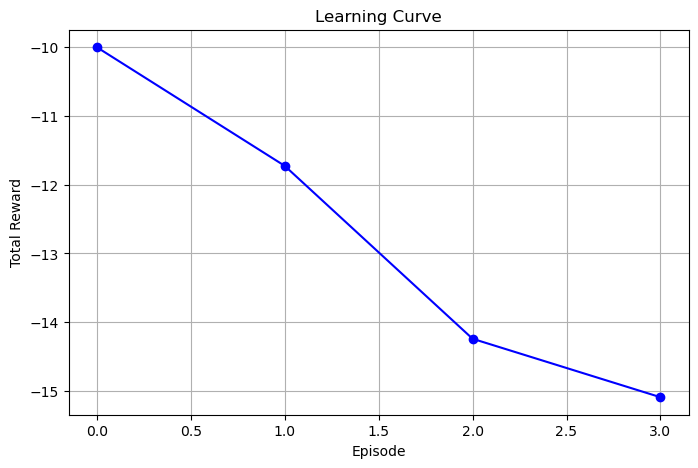


Generated 4 molecules.
1: c1ncc(-c2cnn(C(=)N3CCCC3)c2)c2scc(-c3ccc(Oc4ccccc4)cc3)c12OCON
2: c1ccc(2c3ccccc3-c3ccnc4[n]cc2c34)c(l)c1CCHN
3: Oc1ccc(Cc2cccn3nc(c4ccc(N5CCN(C)CC5)cc4)nc23)cc1F
4: =c1[nH]c(Sc2nnc(C3CCCO3)s2)nc2sc(-c3ccccc3)cc12O


In [65]:
if __name__ == '__main__':
    # Prepare data
    X_train, valid_smiles = prepare_data(df.iloc[:250])
    
    
    
    num_molecules = len(X_train)
    num_features = 2048 + 7  # Fingerprint size + additional descriptors
    num_actions = min(10, num_molecules)  # Ensure actions don't exceed available molecules
    state_size = num_features

    # Initialize environment and agent
    env = DrugDesignEnv(num_features, num_actions, X_train)
    agent = DRLAgent(state_size, num_actions, X_train, num_actions)

    print("Training started...")
    
    # Train the agent
    rewards, generated_smiles = simulate(agent, env, batch_size=32, max_episodes=4,X_train=X_train)
    
    print("Training completed.")

    # Plot Learning Curve
    plt.figure(figsize=(8, 5))
    plt.plot(rewards, marker='o', linestyle='-', color='b')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

    # Display Generated Molecules
    print(f"\nGenerated {len(generated_smiles)} molecules.")
    for idx, sm in enumerate(generated_smiles[:5]):  # Show first 5 molecules
        print(f"{idx + 1}: {sm}")

    # Save results
    pd.DataFrame({'Generated_SMILES': generated_smiles}).to_csv("generated_molecules.csv", index=False)


In [ ]:
X_train